# Programming Assignment 1: Predicting House Prices


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
torch.__version__
pd.__version__

'1.4.1'

#### Read the CSV into a pandas DataFrame

Using random_state, with a given DataFrame, the sample will always fetch same rows. If random_state is None or np.random, then a randomly-initialized RandomState object is returned.

In [20]:
df = pd.read_csv("data/home_data.csv")
# print(df)
# print(df['price'][0])
df.sample(n=3, random_state=0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300


#### Visualize the data

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

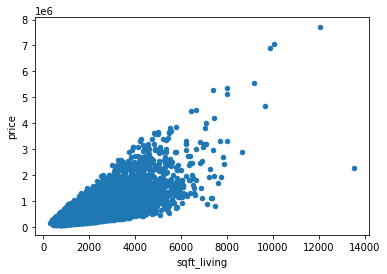

In [21]:
df.plot(kind='scatter', x='sqft_living', y='price')

#### Splitting the data into training and test sets

Use Scikit Learn's <code>train_test_split</code> to split dataframes.

When comparing machine learning algorithms, it's desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by setting the <code>random_state</code> to an integer value. For more information, see [Repeatable Train-Test Splits](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/).

In [22]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
type(train)

pandas.core.frame.DataFrame

The mean price of our training set.

In [23]:
train['price'].mean()

537880.6155002891

### Prepare the data
We need the data as PyTorch tensors for usage in our model. We will need to convert pandas DataFrame to Numpy Array and them Pytorch Tensor. 

To convert a Pandas DataFrame to a Numpy Array, use <code>to_numpy()</code>. To convert a Numpy Array to a PyTorch Tensor, use <code>torch.from_numpy()</code>. For more information, see [this page](https://medium.com/@thackerhelik/linear-regression-in-pytorch-3793d89ff3f).

In [24]:
def df_to_array(dataframe, features, output=['price']):
    """
    Parameters
    ----------
    dataframe: pandas DataFrame
        train or test set
    features: list of strings
        features used to predict sales price of house
    output: list of strings
        the observation variable
    """
    df1 = dataframe.copy(deep=True)
    inputs_array = df1[features].to_numpy()
    targets_array = df1[output].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = df_to_array(train, ['sqft_living'], ['price'])
targets_array
#inputs.dtype

array([[ 353000],
       [ 300523],
       [ 435000],
       ...,
       [ 650000],
       [ 437000],
       [1025000]], dtype=int64)

In [25]:
inputs_train = torch.from_numpy(inputs_array).float()
targets_train = torch.from_numpy(targets_array).float()
inputs_train, targets_train

(tensor([[2190.],
         [2370.],
         [1230.],
         ...,
         [1970.],
         [1980.],
         [3760.]]),
 tensor([[ 353000.],
         [ 300523.],
         [ 435000.],
         ...,
         [ 650000.],
         [ 437000.],
         [1025000.]]))

### Create a linear regression model
#### Define the regression class

In [26]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim, bias=True) # bias default True
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Instantiate model

In [27]:
input_dim = 1
output_dim = 1
model1 = LinearRegression(input_dim, output_dim)

#### Compute RMSE Loss
Compute RMSE instead of MSE for this task.

In [28]:
def RMSELoss(prediction, target):
    loss_function = nn.MSELoss()
    RMSE_loss = torch.sqrt(loss_function(prediction, target))
    return RMSE_loss

#### Optimizer

In [29]:
learningRate = 0.2 # Any small positive value between 0 and 1, try different learning rates
optimizer = torch.optim.SGD(model1.parameters(), lr=learningRate)

#### Training the model

In [30]:
def trainModel(model, x, y, epochs):
    for epoch in range(epochs):
        # Clear gradient buffers so that gradient from previous epoch is not carried to current one
        optimizer.zero_grad()
        
        # Output by model
        y_pred = model(x)
        
        RMSE_loss = RMSELoss(y_pred, y)
        # print(RMSE_loss)
        RMSE_loss.backward()
        
        # Updates the parameters
        optimizer.step()

        print('epoch {}, loss {}'.format(epoch, RMSE_loss.item()))
        
trainModel(model1, inputs_train, targets_train, 50)

epoch 0, loss 645012.75
epoch 1, loss 430990.90625
epoch 2, loss 542606.375
epoch 3, loss 495488.0
epoch 4, loss 520178.375
epoch 5, loss 507850.8125
epoch 6, loss 514196.28125
epoch 7, loss 510974.09375
epoch 8, loss 512622.59375
epoch 9, loss 511782.625
epoch 10, loss 512211.375
epoch 11, loss 511992.5
epoch 12, loss 512103.9375
epoch 13, loss 512047.15625
epoch 14, loss 512076.4375
epoch 15, loss 512061.28125
epoch 16, loss 512069.4375
epoch 17, loss 512065.0625
epoch 18, loss 512067.28125
epoch 19, loss 512066.125
epoch 20, loss 512066.6875
epoch 21, loss 512066.375
epoch 22, loss 512066.5625
epoch 23, loss 512066.53125
epoch 24, loss 512066.5
epoch 25, loss 512066.4375
epoch 26, loss 512066.53125
epoch 27, loss 512066.4375
epoch 28, loss 512066.53125
epoch 29, loss 512066.5625
epoch 30, loss 512066.53125
epoch 31, loss 512066.5625
epoch 32, loss 512066.53125
epoch 33, loss 512066.5625
epoch 34, loss 512066.53125
epoch 35, loss 512066.5625
epoch 36, loss 512066.5625
epoch 37, loss 

#### Model Parameters

In [31]:
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[64.9479]])
linear.bias tensor([-0.8031])


## Use other features in the data

In [32]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

inputs_array2, targets_array2 = df_to_array(train, features, ['price'])
#inputs_array2
#targets_array2

inputs_train2 = torch.from_numpy(inputs_array2).float()
targets_train2 = torch.from_numpy(targets_array2).float()
#inputs_train2, targets_train2

model2 = LinearRegression(6, 1) # Input dimension = 6, output dimension = 1

lr2 = 0.00001 # Any small positive value between 0 and 1, try different learning rates
optimizer = torch.optim.SGD(model2.parameters(), lr=lr2)

trainModel(model2, inputs_train2, targets_train2, 10)

epoch 0, loss 623690.9375
epoch 1, loss 558171.4375
epoch 2, loss 500955.28125
epoch 3, loss 453635.875
epoch 4, loss 417192.0
epoch 5, loss 391398.4375
epoch 6, loss 374673.84375
epoch 7, loss 364639.0625
epoch 8, loss 358961.09375
epoch 9, loss 355870.0625


## Tasks

### Task 1: Selection and Summary Statistics
One neighborhood of Seattle has the highest average house sale price. Note down the ZIP code of this neighborhood and compute the average price. *Save this result to answer the quiz at the end.*

In [33]:
zip_98039 = df['zipcode'] == 98039
df_98039 = df[zip_98039]
df_98039.head()
df_98039.shape

df_98039['price'].mean() # Mean price of houses in this neighborhood

2160606.6

### Task 2: Filtering Data
- Use logical filters to select rows of an SFrame.
- Using such filters, first select the houses that have 'sqft_living' higher than 2000 sqft but no larger than 4000 sqft.
- What fraction of the all houses have 'sqft_living' in this range? *Save this result to answer the quiz at the end.*


### Task 3: Building the Model
Use the original dataset and build a model using the following features: bedrooms, bathrooms, sqft_living, sqft_lot, floors, zipcode, condition, grade, waterfront, view, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15.

Compute the RMSE (root mean squared error) on the test data for the model using basic features and advanced features.

Note:
- When doing the train-test split, make sure to use seed=0.
- RMSE is the square root of the mean RSS.

What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features? *Save this result to answer the quiz at the end.*

In [34]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [35]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
len(advanced_features) # This will be the input dimension of the model

18

#### Testing the Model

First, prepare the test set. Then, use the models to make predictions for test data.

In [36]:
x_test_array, y_test_array = df_to_array(test, features, ['price'])
x_test = torch.from_numpy(x_test_array).float()
y_test = torch.from_numpy(y_test_array).float()